In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [99]:
df=pd.read_csv('abolone.csv')
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [101]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [102]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


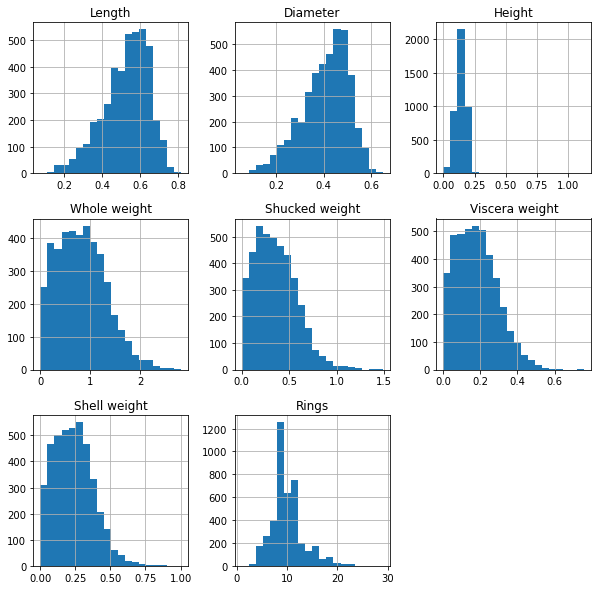

In [103]:
df.hist(bins=20,figsize=(10,10))
plt.show()

In [104]:
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [105]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

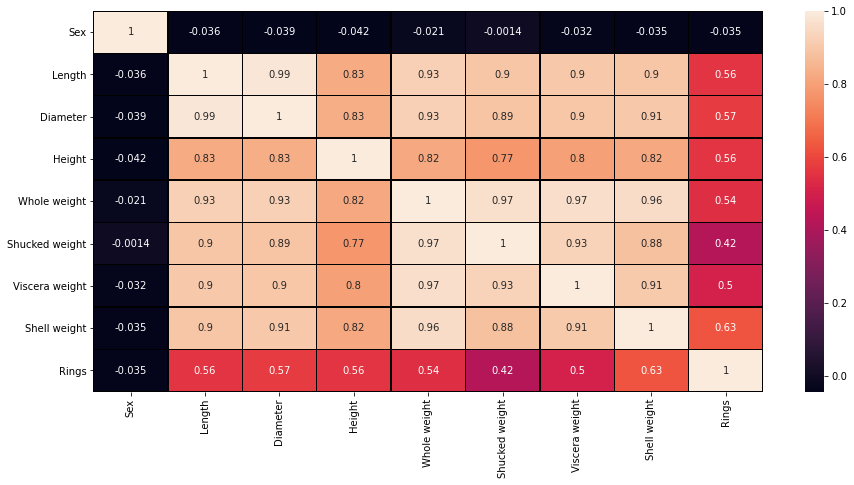

In [106]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

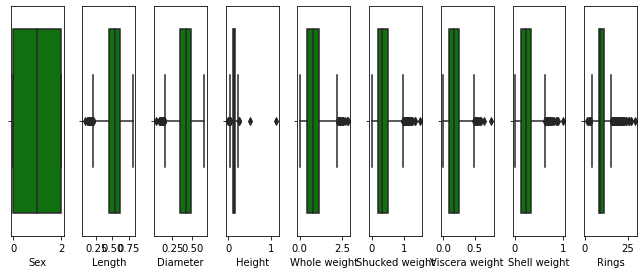

In [107]:
collist=df.columns.values
ncol=20
nrows=16
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

In [108]:
from scipy.stats import zscore
import numpy as np

In [109]:
z=np.abs(zscore(df.iloc[:,:-1]))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.60768536, 0.72621157,
        0.63821689],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.17090984, 1.20522124,
        1.21298732],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.4634999 , 0.35668983,
        0.20713907],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.74855917, 0.97541324,
        0.49695471],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.77334105, 0.73362741,
        0.41073914],
       [1.15198011, 1.54905203, 1.48263359, ..., 2.64099341, 1.78744868,
        1.84048058]])

In [110]:
threshold=3
print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
        891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
       1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
       1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
       2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
       2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
       2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
       3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
       3902, 3961, 3962, 3996, 4145, 4148], dtype=int64), array([7, 7, 7, 7, 4, 5, 7, 7, 7, 6, 1, 2, 3, 1, 2, 1, 2, 1, 7, 7

In [111]:
df_new=df[(z<3) .all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [112]:
print(df.shape)
print(df_new.shape)

(4177, 9)
(4084, 9)


In [113]:
loss_percent=(4177-4084)/4177*100
print(loss_percent)

2.2264783337323437


In [114]:
df_new.skew()

Sex              -0.092911
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

<AxesSubplot:xlabel='Length', ylabel='Density'>

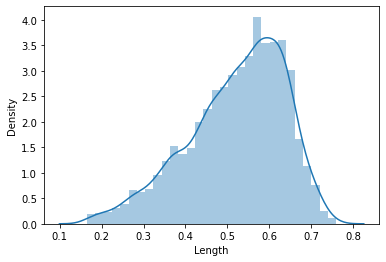

In [115]:
sns.distplot(df_new['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

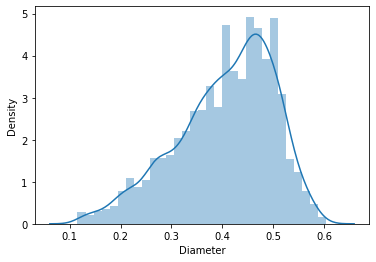

In [116]:
sns.distplot(df_new['Diameter'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

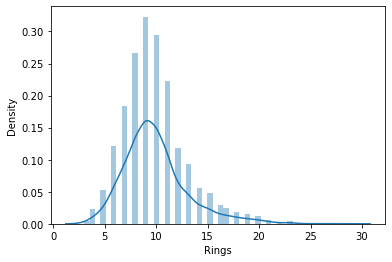

In [117]:
sns.distplot(df_new['Rings'])

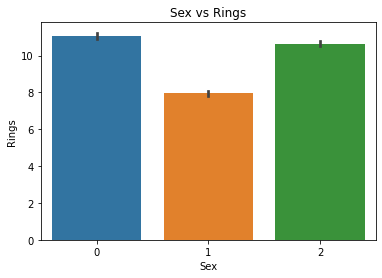

In [118]:
sns.barplot(x="Sex",y="Rings",data=df_new)
plt.title("Sex vs Rings")
plt.show()

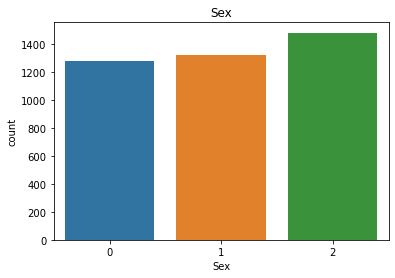

In [119]:
sns.countplot(x="Sex",data=df_new)
plt.title("Sex")
plt.show()

In [120]:
df_new['Age'] = df_new['Rings'] + 1.5

<AxesSubplot:xlabel='Sex', ylabel='Age'>

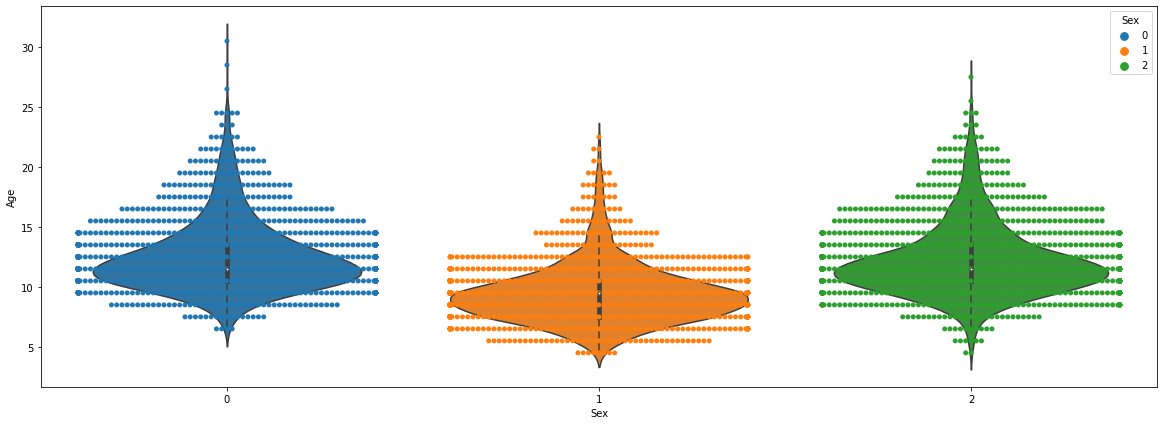

In [121]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df_new, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df_new)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
x=df_new.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [124]:
x.shape

(4084, 9)

In [125]:
y=df_new.iloc[:,-1]
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4084, dtype: float64

In [126]:
y.shape

(4084,)

In [127]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [128]:
vif_calc()

   VIF Factor        features
0    2.579035             Sex
1  710.699839          Length
2  767.330553        Diameter
3   95.479057          Height
4  446.229691    Whole weight
5  121.707909  Shucked weight
6   65.927615  Viscera weight
7   93.505848    Shell weight
8   22.289259           Rings


In [129]:
df_new.drop(['Length','Shucked weight','Age'],axis=1,inplace=True)

In [130]:
df_new

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [131]:
x=df_new.iloc[:,:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [132]:
x.shape

(4084, 6)

In [133]:
vif_calc()

   VIF Factor        features
0    2.555172             Sex
1   85.434314        Diameter
2   88.727438          Height
3  132.710175    Whole weight
4   60.753730  Viscera weight
5   59.570263    Shell weight


<AxesSubplot:>

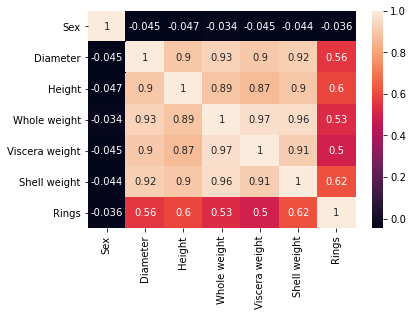

In [134]:
sns.heatmap(df_new.corr(),annot=True)

In [135]:
x=df_new.iloc[:,0:-1]

x


,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [136]:
print(x.shape)
print(y.shape)

(4084, 6)
(4084,)


In [137]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.1577438 , -0.43102345, -1.17659224, -0.64383636, -0.73148499,
        -0.64218694],
       [ 1.1577438 , -1.47447322, -1.31174068, -1.2747622 , -1.23959876,
        -1.26010684],
       [-1.28011425,  0.14287393, -0.09540474, -0.28736873, -0.33951152,
        -0.17874702],
       ...,
       [ 1.1577438 ,  0.7167713 ,  1.79667339,  0.80390334,  1.07352867,
         0.57820485],
       [-1.28011425,  0.82111628,  0.31004058,  0.62566952,  0.81705219,
         0.48551686],
       [ 1.1577438 ,  1.55153111,  1.52637652,  2.49329748,  1.93490248,
         2.0225926 ]])

In [138]:
x.shape

(4084, 6)

In [139]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [140]:
xtrain.shape

(2858, 6)

In [141]:
ytrain.shape

(2858,)

In [142]:
xtest.shape

(1226, 6)

In [143]:
ytest.shape

(1226,)

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [145]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([-0.00778852,  0.29178473,  0.95553481, -2.46210457, -0.40964251,
        3.56399043])

In [146]:
features=['Sex','Diameter','Height','Whole weight','Viscera weight','Shell weight']

list(zip(lr.coef_,features))

[(-0.007788517881021502, 'Sex'),
 (0.29178472854936177, 'Diameter'),
 (0.9555348109346273, 'Height'),
 (-2.4621045694117534, 'Whole weight'),
 (-0.4096425108402109, 'Viscera weight'),
 (3.5639904345420343, 'Shell weight')]

In [147]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,-0.007789
Diameter,0.291785
Height,0.955535
Whole weight,-2.462105
Viscera weight,-0.409643
Shell weight,3.563990


In [148]:
lr.intercept_

11.37458158226488

In [149]:
lr.score(xtrain,ytrain)

0.4606904543795639

In [150]:
pred=lr.predict(xtest)
pred

array([13.56407381,  9.06811332, 11.40746657, ..., 11.39363484,
       10.76288191,  7.2520256 ])

In [151]:
print("Predicted values",pred)

Predicted values [13.56407381  9.06811332 11.40746657 ... 11.39363484 10.76288191
  7.2520256 ]


In [152]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,13.564074
1,9.068113
2,11.407467
3,13.981567
4,10.019641
...,...
1221,10.734481
1222,11.435803
1223,11.393635
1224,10.762882


In [153]:
lr.score(xtest,ytest)

0.4388487121892799

In [154]:
print("Mean absolute error::",mean_absolute_error(ytest,pred))
print("Mean squared error::",mean_squared_error(ytest,pred))
print("Root mean square ::",np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 1.6975450373895653
Mean squared error:: 5.659743688605791
Root mean square :: 2.3790215822068093


In [155]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 0.4388487121892799


Hyper Tuning Methods

In [159]:
from sklearn.linear_model import ElasticNet

In [160]:
enr=ElasticNet(alpha=0.0001)
enr.fit(xtrain,ytrain)
enrpred=enr.predict(xtest)
print(enr.score(xtrain,ytrain))
enr.coef_


0.4606902166212351


array([-0.00781217,  0.29069323,  0.95583597, -2.45413757, -0.41203023,
        3.55908091])

In [161]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(xtrain,ytrain)
    print(sv.score(xtrain,ytrain))

0.4299756358900646
0.35277893554248674
0.47991263438681697


#Export The Data

In [164]:
import pickle
filename="Abolone.pkl"
pickle.dump(lr,open(filename,'wb'))

In [166]:
import numpy as np
a=np.array(ytest)
predicted=np.array(lr.predict(xtest))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [167]:
df_com

,orginal,predicted
0,10.5,13.564074
1,8.5,9.068113
2,10.5,11.407467
3,16.5,13.981567
4,9.5,10.019641
...,...,...
1221,10.5,10.734481
1222,20.5,11.435803
1223,10.5,11.393635
1224,8.5,10.762882
